<a href="https://colab.research.google.com/github/usm-cos422-522/courseMaterials/blob/main/Lectures/ImageNormalizationBroadcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2         #image processing library    
import imageio
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# we get an image from the unsplash website and name it eiffel.jpg
!wget --output-document=eiffel.jpeg 'https://images.unsplash.com/photo-1543349689-9a4d426bee8e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2901&q=80'

--2022-09-18 15:05:17--  https://images.unsplash.com/photo-1543349689-9a4d426bee8e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2901&q=80
Resolving images.unsplash.com (images.unsplash.com)... 146.75.38.208, 2a04:4e42:79::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.38.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 842941 (823K) [image/jpeg]
Saving to: ‘eiffel.jpeg’

eiffel.jpeg         100%[===================>] 823.18K  --.-KB/s    in 0.06s   

2022-09-18 15:05:18 (14.6 MB/s) - ‘eiffel.jpeg’ saved [842941/842941]



In [3]:
img = cv2.imread('eiffel.jpeg')
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(2101, 2901, 3)


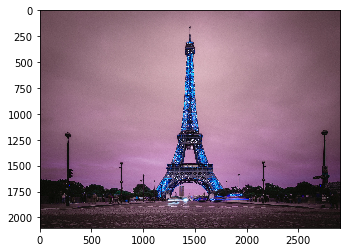

In [ ]:
plt.imshow(img, interpolation='nearest')

In [ ]:
# Nueral networks work best with smaller numbers that have been scaled 
# so want to measure RGB pixel values from how many standard deviations from mean, 
#moving from integer to float

img2 = np.zeros(img.shape,dtype="float32") 

img2[:,:,0] = (img[:,:,0] - img[:,:,0].mean())/img[:,:,0].std()
img2[:,:,1] = (img[:,:,1] - img[:,:,1].mean())/img[:,:,1].std()
img2[:,:,2] = (img[:,:,2] - img[:,:,2].mean())/img[:,:,2].std()
img2

array([[[-0.5104913 , -0.56411767, -0.7227654 ],
        [-0.5632453 , -0.63189423, -0.78197896],
        [-0.5456606 , -0.60930204, -0.7622411 ],
        ...,
        [-0.84459966, -0.8578162 , -1.0583092 ],
        [-0.8621843 , -0.8804084 , -1.0780472 ],
        [-0.8973536 , -0.9255928 , -1.1175228 ]],

       [[-0.5104913 , -0.56411767, -0.7227654 ],
        [-0.6159992 , -0.69967085, -0.8411926 ],
        [-0.6511685 , -0.7448552 , -0.88066834],
        ...,
        [-0.84459966, -0.8578162 , -1.0583092 ],
        [-0.8621843 , -0.8804084 , -1.0780472 ],
        [-0.8973536 , -0.9255928 , -1.1175228 ]],

       [[-0.5456606 , -0.60930204, -0.7622411 ],
        [-0.5808299 , -0.6544864 , -0.80171686],
        [-0.6159992 , -0.69967085, -0.8411926 ],
        ...,
        [-0.84459966, -0.8578162 , -1.0583092 ],
        [-0.8621843 , -0.8804084 , -1.0780472 ],
        [-0.8973536 , -0.9255928 , -1.1175228 ]],

       ...,

       [[-1.776586  , -1.7163197 , -1.9070379 ],
        [-1

In [ ]:
# Oh, we could shorten it even more .. we know the rules of broadcasting
(img - img.mean(axis=(0,1)))/img.std(axis=(0,1))

array([[[-0.51049133, -0.56411766, -0.72276537],
        [-0.56324527, -0.63189424, -0.78197899],
        [-0.54566062, -0.60930205, -0.76224112],
        ...,
        [-0.84459966, -0.85781621, -1.05830923],
        [-0.86218431, -0.8804084 , -1.07804711],
        [-0.89735361, -0.9255928 , -1.11752286]],

       [[-0.51049133, -0.56411766, -0.72276537],
        [-0.61599922, -0.69967083, -0.84119262],
        [-0.65116852, -0.74485523, -0.88066836],
        ...,
        [-0.84459966, -0.85781621, -1.05830923],
        [-0.86218431, -0.8804084 , -1.07804711],
        [-0.89735361, -0.9255928 , -1.11752286]],

       [[-0.54566062, -0.60930205, -0.76224112],
        [-0.58082992, -0.65448644, -0.80171687],
        [-0.61599922, -0.69967083, -0.84119262],
        ...,
        [-0.84459966, -0.85781621, -1.05830923],
        [-0.86218431, -0.8804084 , -1.07804711],
        [-0.89735361, -0.9255928 , -1.11752286]],

       ...,

       [[-1.77658608, -1.71631967, -1.90703783],
        [-1